In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import pingouin as pg
import nibabel as nii
import numpy as np 

In [16]:
df = pd.read_csv("isbi_results_individual_volume.csv")
df=df[df.columns[1:]]
display(df["struct"].unique())
display(df["method"].unique())
df=df[~df["method"].isin(['Pair-zero-mean',"Pair-aug"])]
#df=df[df["method"].isin(["Affine","Pair","OP"])]
#df=df[~df["method"].isin(['Pair-zero-mean',"Pair-aug",'SyN'])]
#df=df[~df["struct"].isin(["bs","bg","th","cb","str","hpf","hy"])]
df=df[~df["struct"].isin(["bs","bg"])]

display(df["struct"].unique())
display(df["method"].unique())


df["dice"]=df["dice"].apply(lambda x : float(x))
df.sort_values("dice")


array(['bg', 'hy', 'mb', 'hpf', 'str', 'ctx', 'gp', 'th', 'cb', 'olf',
       'bs'], dtype=object)

array(['Affine', 'SyN', 'SyN-Mean', 'SyN-Mask', 'DL-IRIS', 'DL-GIN-3fold',
       'OP', 'Pair', 'Pair-aug', 'Pair-zero', 'Pair-null'], dtype=object)

array(['hy', 'mb', 'hpf', 'str', 'ctx', 'gp', 'th', 'cb', 'olf'],
      dtype=object)

array(['Affine', 'SyN', 'SyN-Mean', 'SyN-Mask', 'DL-IRIS', 'DL-GIN-3fold',
       'OP', 'Pair', 'Pair-zero', 'Pair-null'], dtype=object)

,method,struct,mouse,dice,volume
270,Affine,gp,M877,0.279148,1.520640
215,Affine,gp,M866,0.286747,1.306368
1128,SyN-Mask,gp,M872,0.288268,1.531008
237,Affine,gp,M872,0.297347,1.238976
1557,DL-GIN-3fold,gp,M672,0.297674,1.410048
...,...,...,...,...,...
2274,Pair,cb,M757,0.924931,60.317568
2868,Pair-zero,cb,M757,0.925720,61.596288
2065,OP,cb,M886,0.925798,62.049024
2340,Pair,cb,M875,0.927782,61.672320


In [17]:
dfMouseAvg=df.groupby(["method","struct"]).agg({"dice" : ['mean','std']})
dfMouseAvg.columns = dfMouseAvg.columns.map('_'.join).str.strip('_')

#dfMouseAvg.columns = dfMouseAvg.columns.droplevel(0)
dfMouseAvg=dfMouseAvg.reset_index()
dfMouseAvg

,method,struct,dice_mean,dice_std
0,Affine,cb,0.857671,0.033220
1,Affine,ctx,0.886794,0.014822
2,Affine,gp,0.514315,0.158307
3,Affine,hpf,0.863390,0.016957
4,Affine,hy,0.806806,0.028724
...,...,...,...,...
85,SyN-Mean,hy,0.815907,0.022458
86,SyN-Mean,mb,0.764855,0.029077
87,SyN-Mean,olf,0.678044,0.018329
88,SyN-Mean,str,0.881826,0.019911


<Axes: xlabel='struct', ylabel='dice'>

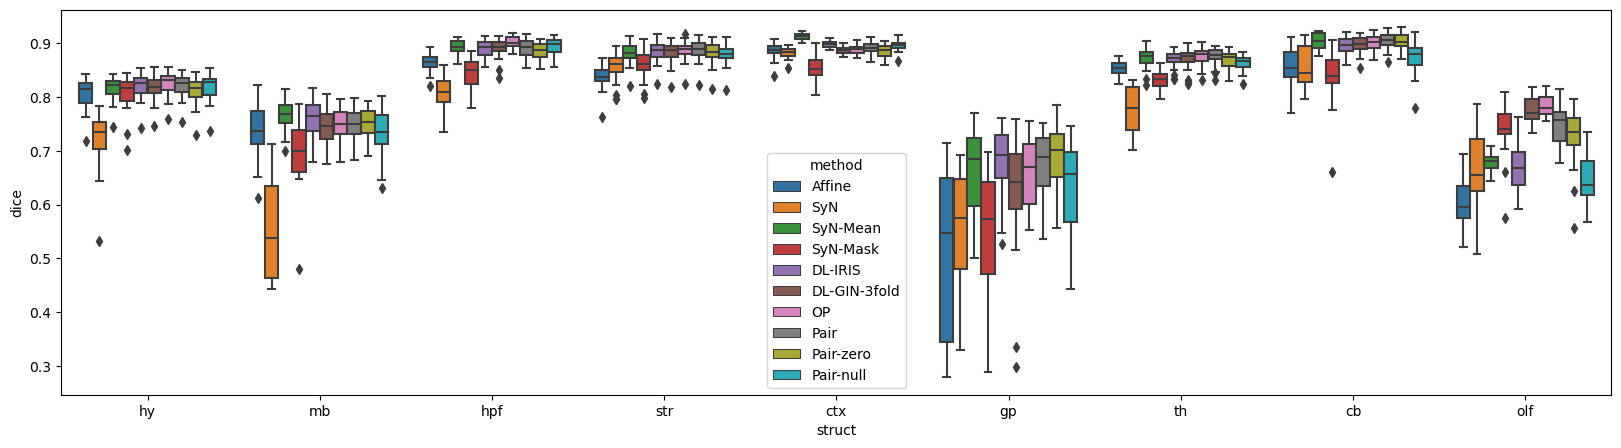

In [19]:

plt.figure(figsize=(20,5))
sns.boxplot(data=df,x="struct",y="dice", hue="method")



In [21]:
dfpivotMean=dfMouseAvg.pivot(index='method', columns='struct',values="dice_mean")
dfpivotMean



struct,cb,ctx,gp,hpf,hy,mb,olf,str,th
method,,,,,,,,,
Affine,0.857671,0.886794,0.514315,0.863390,0.806806,0.736638,0.602230,0.839007,0.852386
DL-GIN-3fold,0.896598,0.886729,0.623884,0.891365,0.817265,0.745521,0.775468,0.882065,0.870637
DL-IRIS,0.895938,0.898293,0.676463,0.890716,0.820176,0.760637,0.671149,0.885652,0.870482
OP,0.901182,0.888413,0.656310,0.902196,0.825431,0.750200,0.783603,0.887016,0.875866
Pair,0.904648,0.892719,0.677210,0.891447,0.821487,0.749937,0.747110,0.887853,0.874608
Pair-null,0.873899,0.896904,0.631544,0.895254,0.818574,0.735017,0.647591,0.879145,0.864453
Pair-zero,0.903547,0.884327,0.688786,0.886398,0.811301,0.751334,0.727987,0.882794,0.868056
SyN,0.856991,0.883219,0.560052,0.809395,0.722350,0.548843,0.670673,0.856675,0.777479
SyN-Mask,0.838019,0.852786,0.552573,0.844641,0.807644,0.699735,0.741430,0.861087,0.833286


In [22]:
methodRanking=dfpivotMean.mean(axis=1).sort_values()
methodRanking

method
SyN             0.742853
Affine          0.773249
SyN-Mask        0.781245
Pair-null       0.804709
DL-IRIS         0.818834
SyN-Mean        0.819952
DL-GIN-3fold    0.821059
Pair-zero       0.822725
Pair            0.827447
OP              0.830024
dtype: float64

In [23]:
structRanking=dfpivotMean.mean(axis=0).sort_values()
structRanking

struct
gp     0.623710
olf    0.704529
mb     0.724272
hy     0.806694
th     0.855921
str    0.874312
hpf    0.876779
cb     0.883330
ctx    0.888341
dtype: float64

In [24]:
structRankingByVariance=dfpivotMean.std(axis=0).sort_values()
structRankingByVariance

struct
ctx    0.015356
str    0.016390
cb     0.024658
hpf    0.029283
hy     0.030231
th     0.030424
olf    0.059329
gp     0.060667
mb     0.064231
dtype: float64

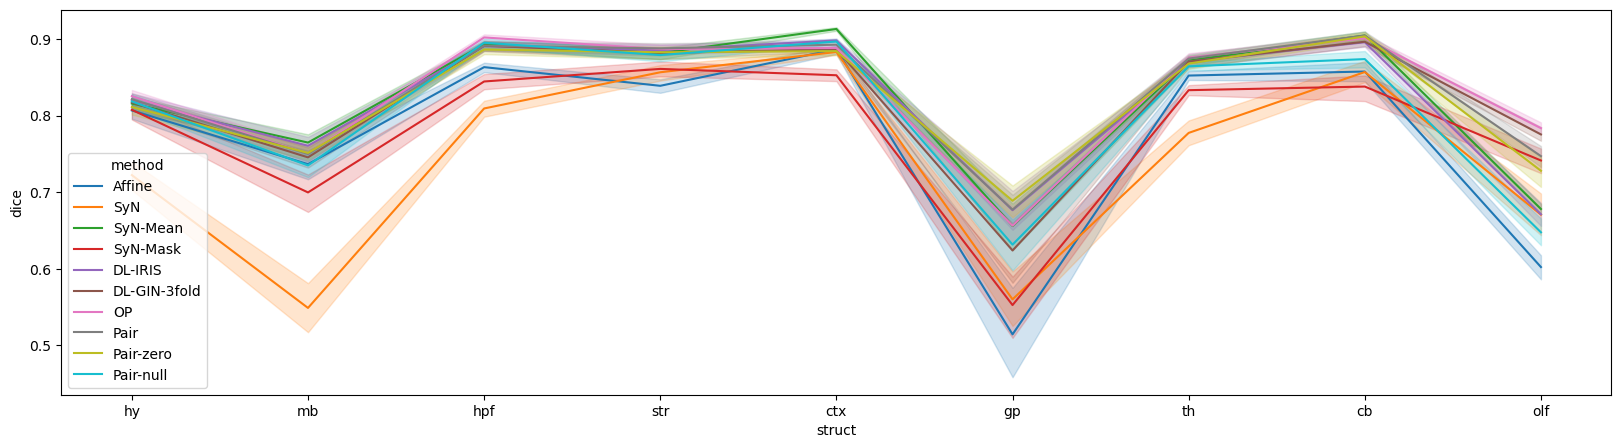

In [26]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df, x="struct",y="dice", hue="method")
plt.savefig("ranking.png")

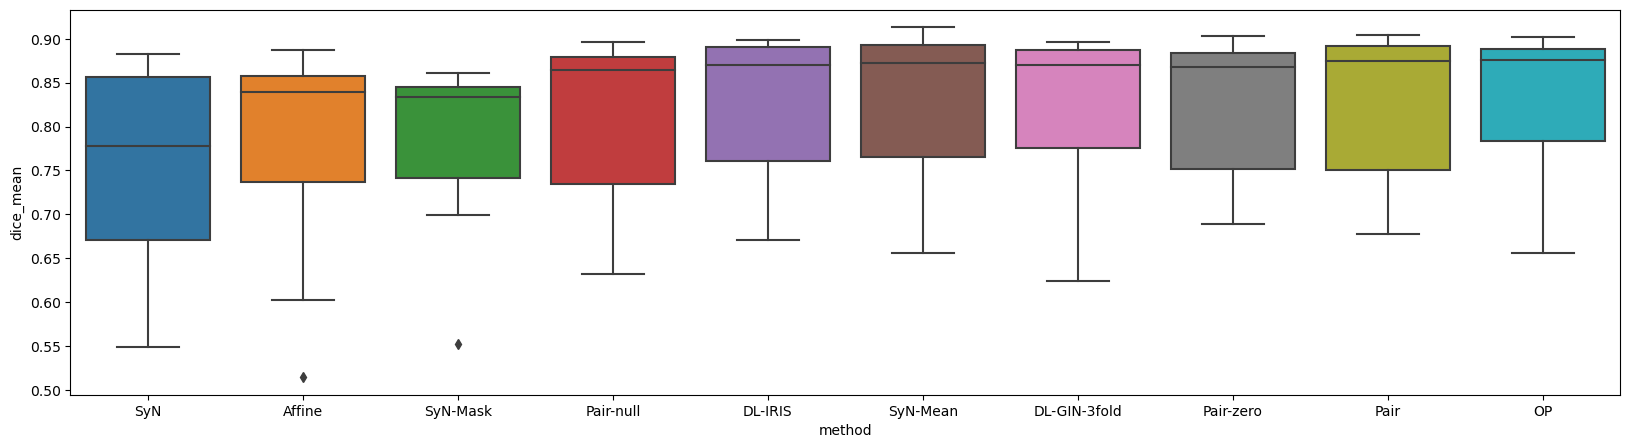

In [27]:
plt.figure(figsize=(20,5))
sns.boxplot(data=dfMouseAvg, x="method",y="dice_mean", order=methodRanking.index )
plt.savefig("ranking2.png")

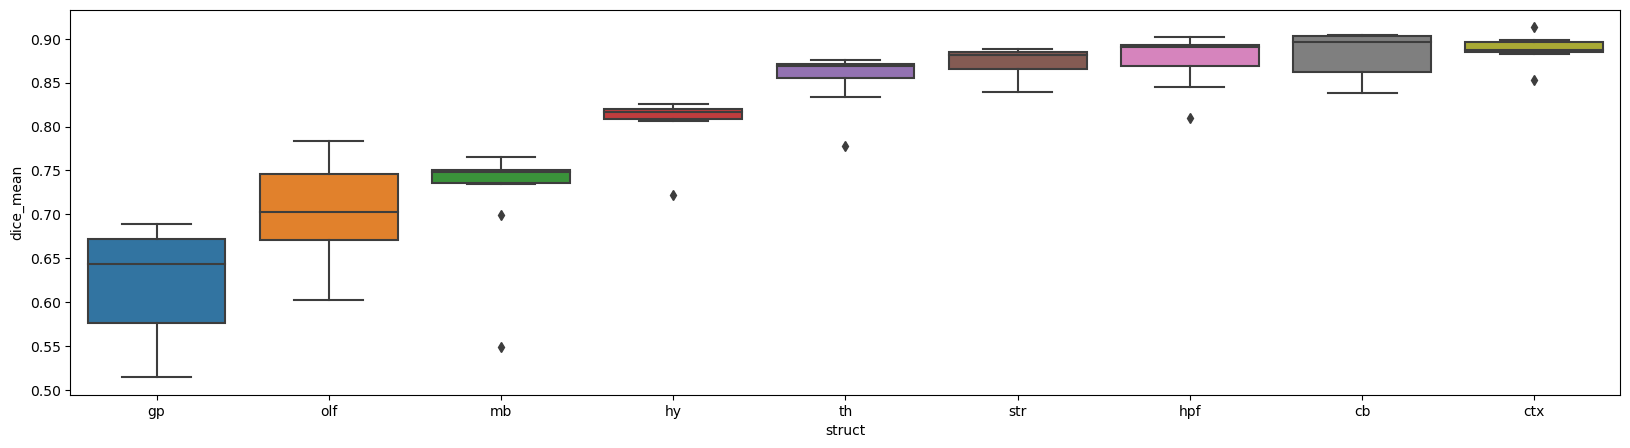

In [28]:
plt.figure(figsize=(20,5))
sns.boxplot(data=dfMouseAvg, x="struct",y="dice_mean", order=structRanking.index)
plt.savefig("ranking3.png")

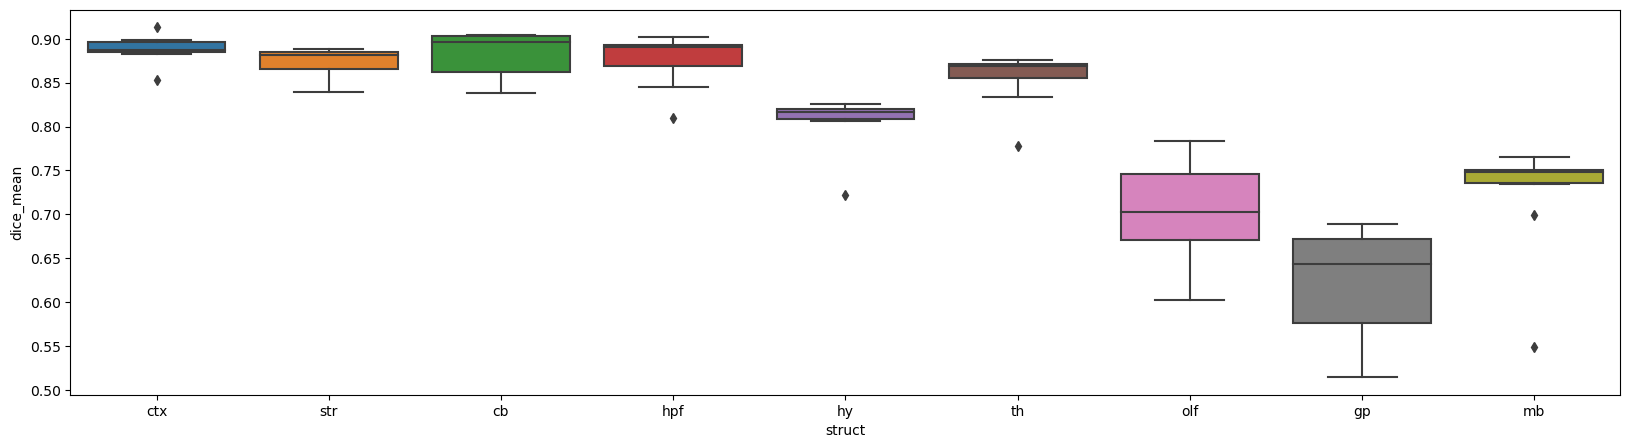

In [29]:
plt.figure(figsize=(20,5))
sns.boxplot(data=dfMouseAvg, x="struct",y="dice_mean", order=structRankingByVariance.index)
plt.savefig("ranking3bis.png")

gp : petite structure / peu contrasté => difficile à segmenter
olf : sensible au fied of view => grand variabilité morpho / pb de crop
mb : structure peu contrasté / mal définiee ?
hy : inferior : pb RSN / biais / variabilté FOV / decoupe

ctx / str / hpf / cb / th

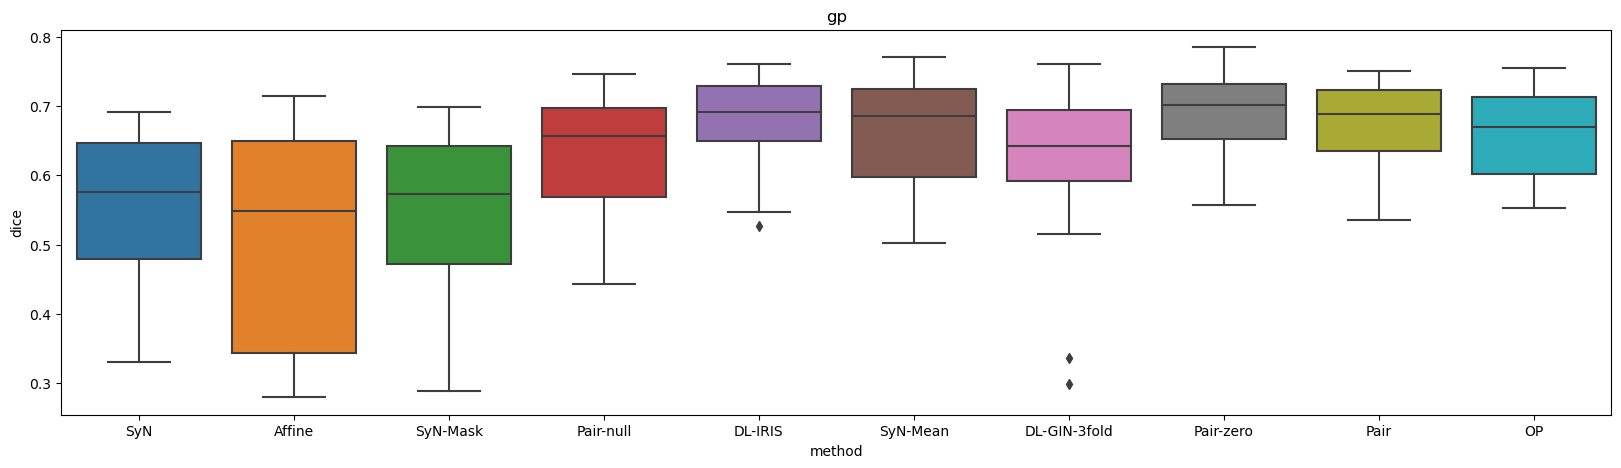

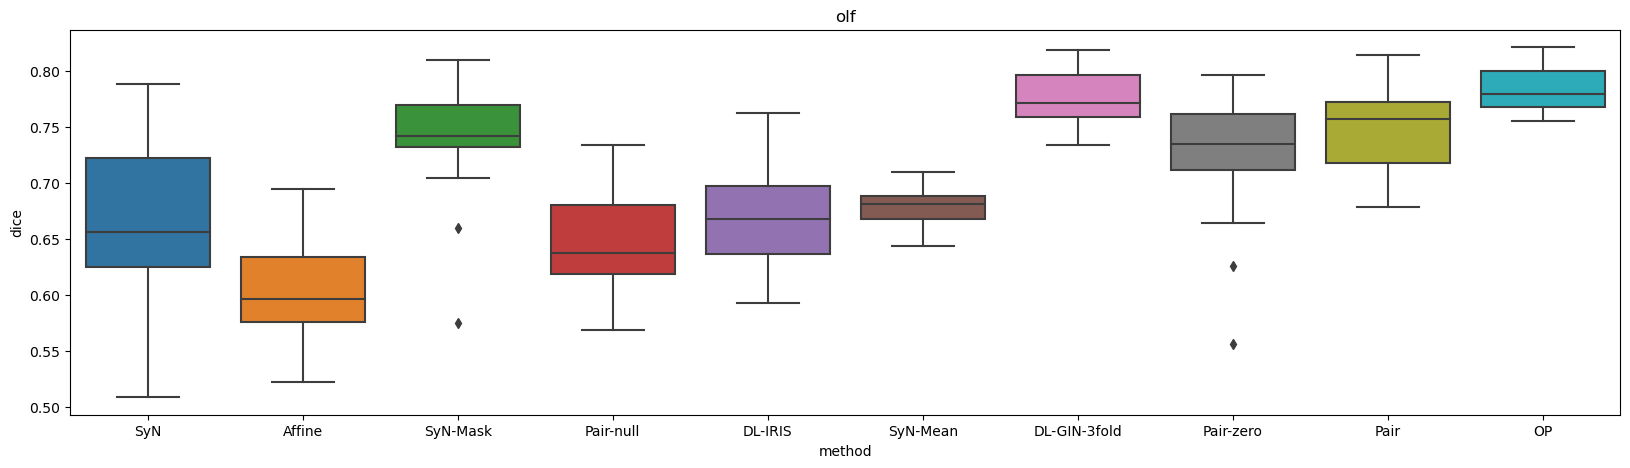

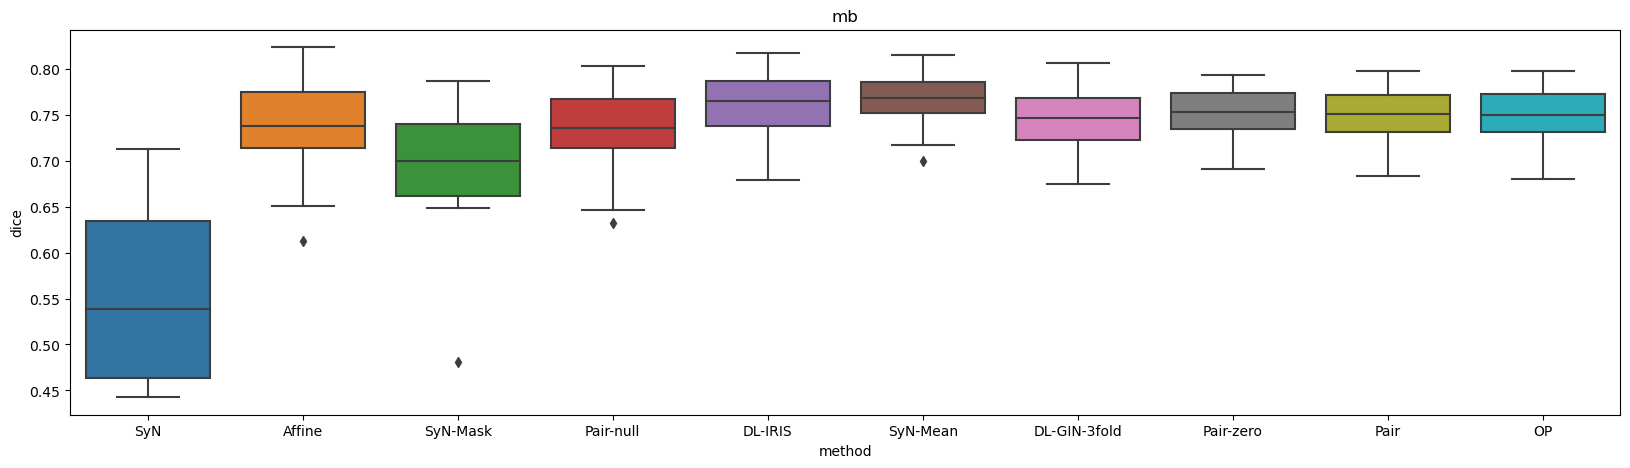

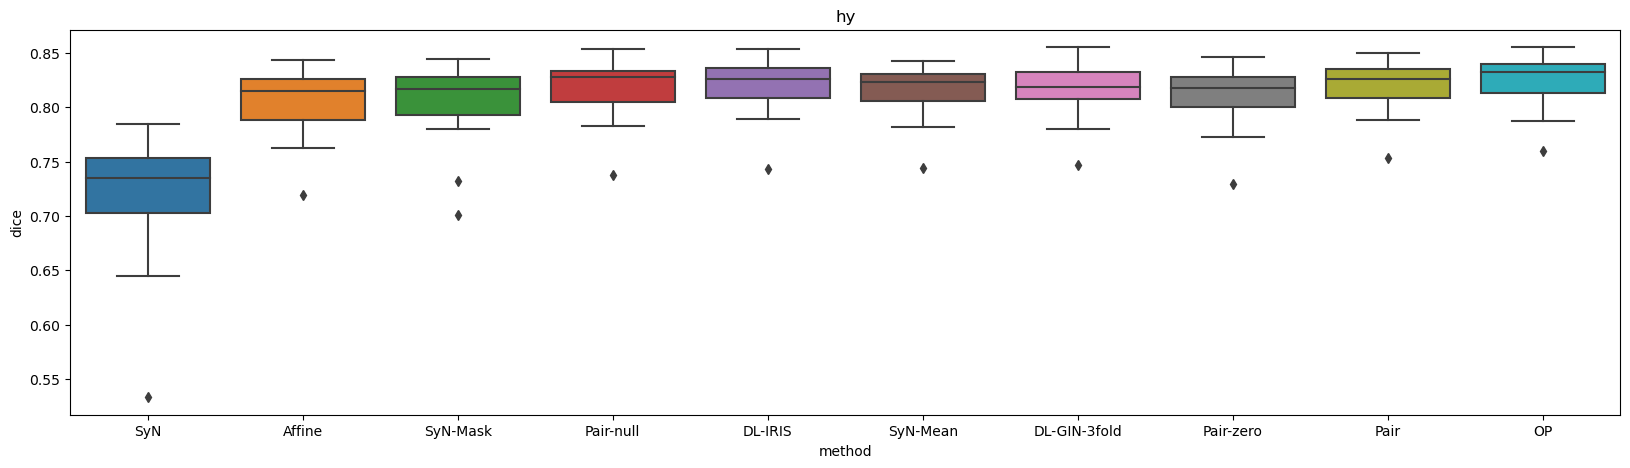

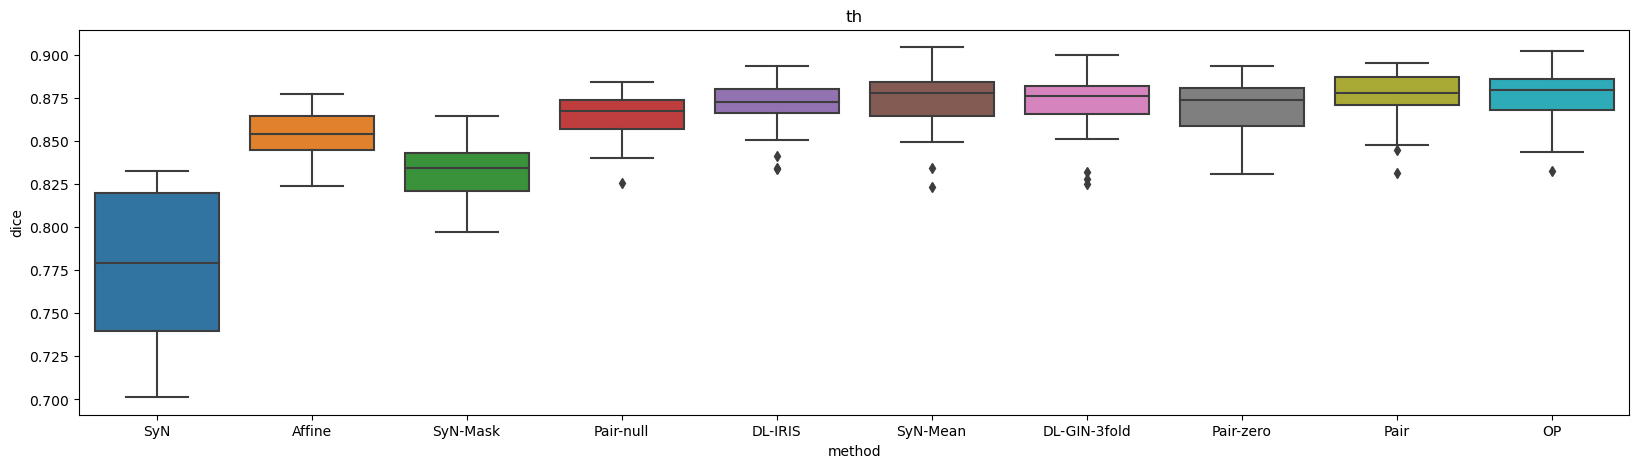

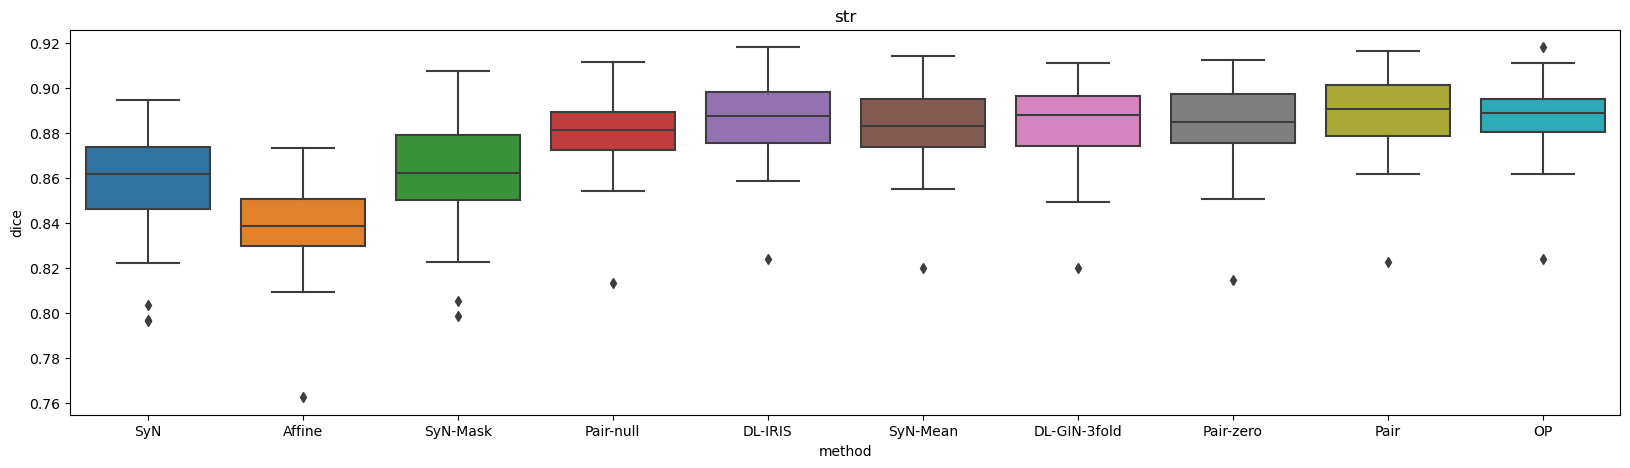

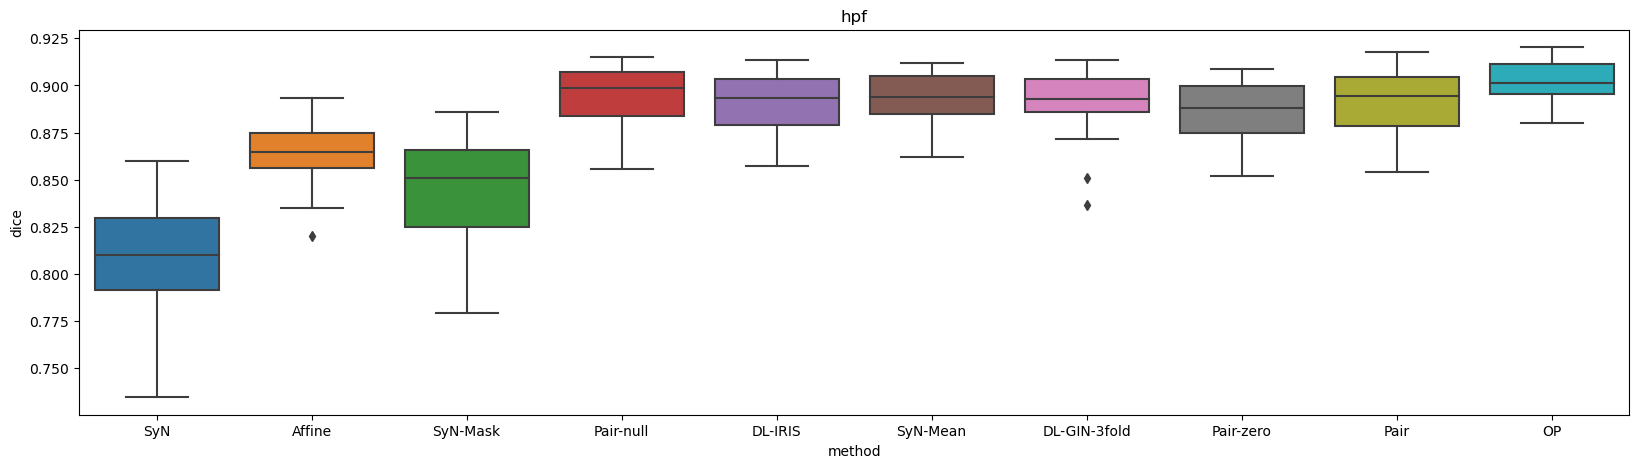

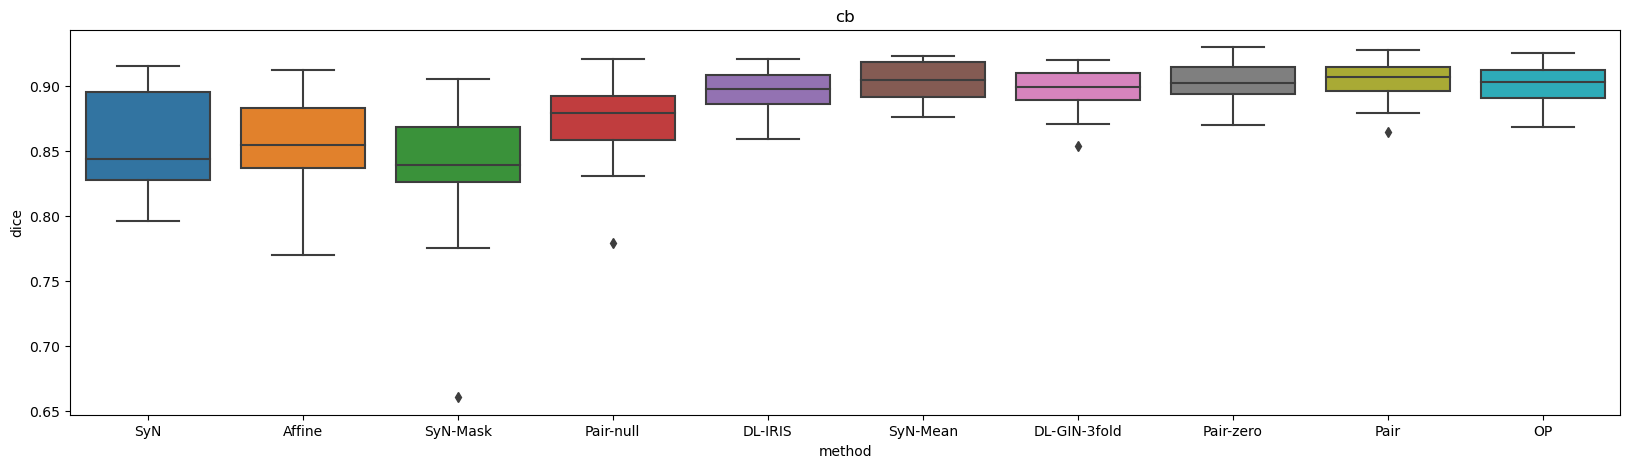

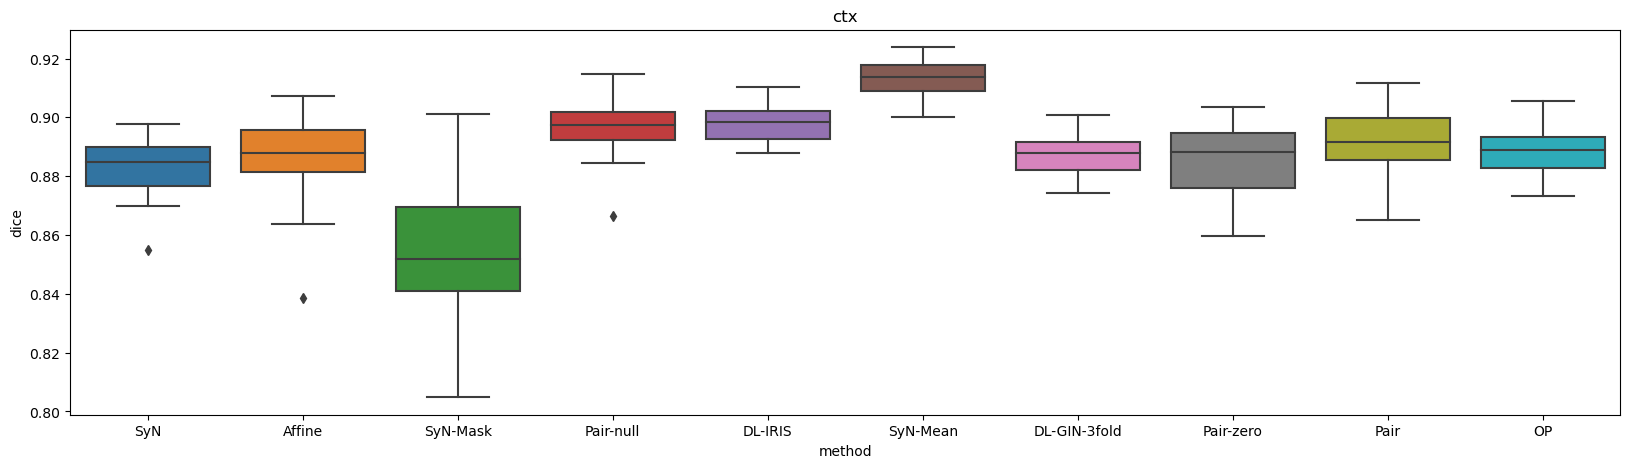

In [30]:
for item in structRanking.index :
    plt.figure(figsize=(20,5))
    sns.boxplot(data=df[df["struct"]==item], x="method",y="dice", order=methodRanking.index )
    plt.title(item)
    plt.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Pair vs. OP: Mann-Whitney-Wilcoxon test two-sided, P_val:2.464e-01 U_stat=4.320e+02
Pair-zero vs. Pair: Mann-Whitney-Wilcoxon test two-sided, P_val:5.109e-01 U_stat=4.030e+02
DL-IRIS vs. DL-GIN-3fold: Mann-Whitney-Wilcoxon test two-sided, P_val:3.632e-02 U_stat=4.860e+02
Pair-null vs. SyN-Mean: Mann-Whitney-Wilcoxon test two-sided, P_val:2.193e-01 U_stat=2.930e+02
DL-GIN-3fold vs. OP: Mann-Whitney-Wilcoxon test two-sided, P_val:3.966e-01 U_stat=3.150e+02
Pair-null vs. Pair-zero: Mann-Whitney-Wilcoxon test two-sided, P_val:1.952e-02 U_stat=2.290e+02
SyN-Mean vs. OP: Mann-Whitney-Wilcoxon test two-sided, P_val:7.819e-01 U_stat=3.810e+02


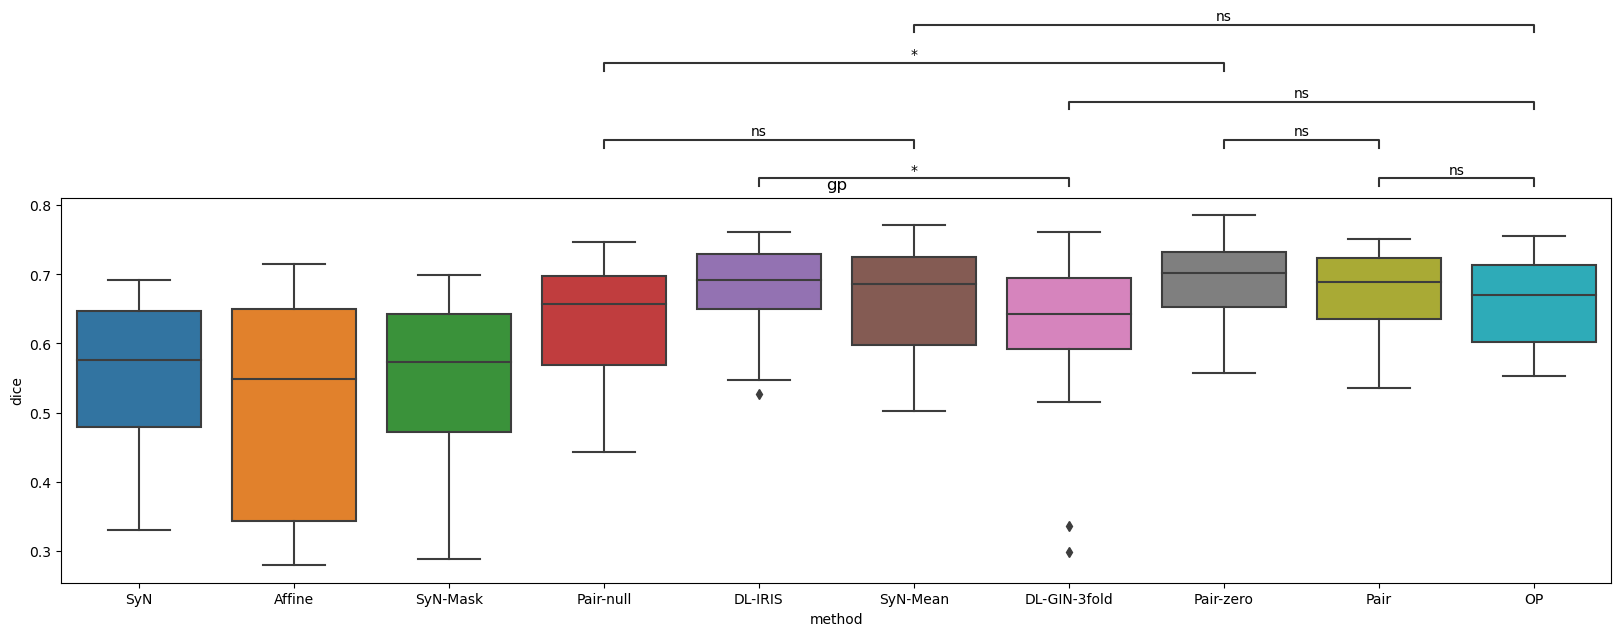

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Pair vs. OP: Mann-Whitney-Wilcoxon test two-sided, P_val:3.904e-04 U_stat=1.590e+02
Pair-zero vs. Pair: Mann-Whitney-Wilcoxon test two-sided, P_val:2.066e-01 U_stat=2.910e+02
DL-IRIS vs. DL-GIN-3fold: Mann-Whitney-Wilcoxon test two-sided, P_val:1.563e-09 U_stat=1.500e+01
Pair-null vs. SyN-Mean: Mann-Whitney-Wilcoxon test two-sided, P_val:8.123e-03 U_stat=2.110e+02
DL-GIN-3fold vs. OP: Mann-Whitney-Wilcoxon test two-sided, P_val:2.394e-01 U_stat=2.960e+02
Pair-null vs. Pair-zero: Mann-Whitney-Wilcoxon test two-sided, P_val:1.273e-06 U_stat=8.400e+01
SyN-Mean vs. OP: Mann-Whitney-Wilcoxon test two-sided, P_val:3.031e-10 U_stat=0.000e+00


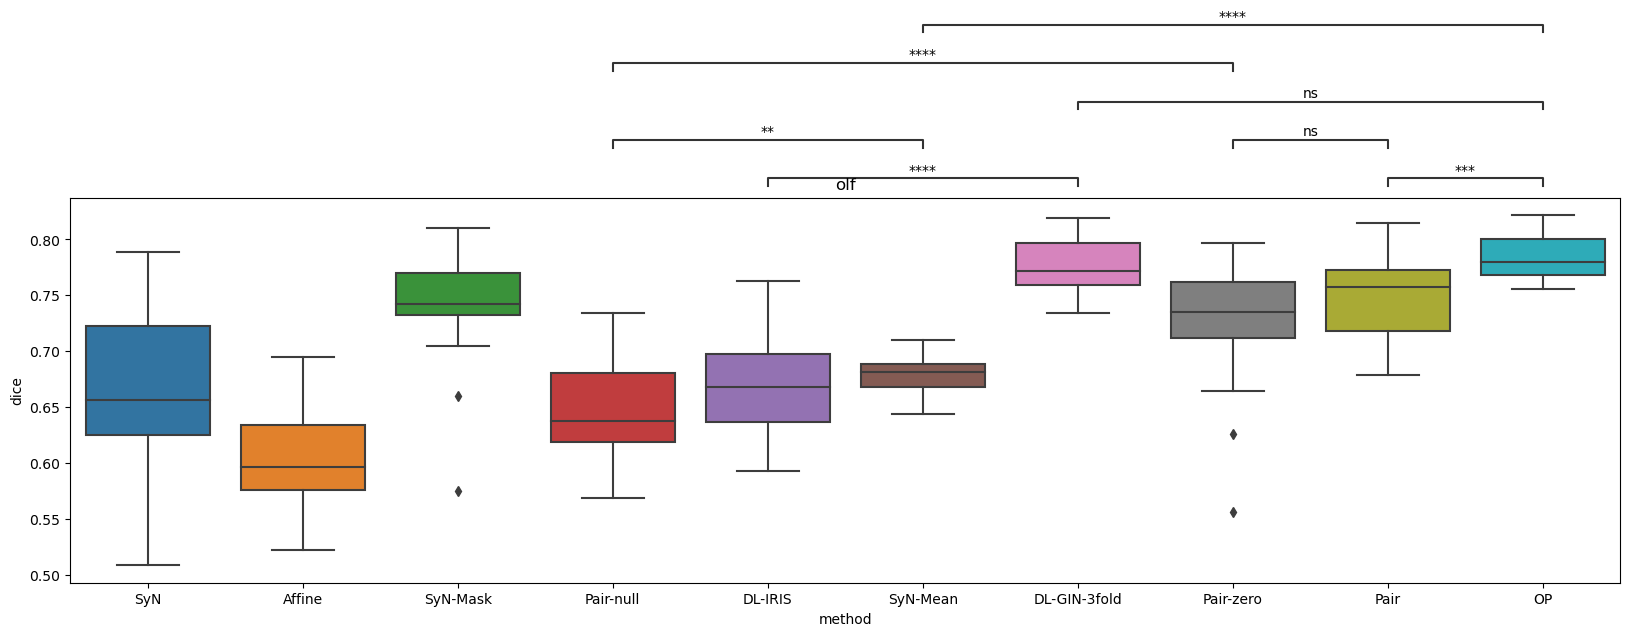

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Pair vs. OP: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=3.640e+02
Pair-zero vs. Pair: Mann-Whitney-Wilcoxon test two-sided, P_val:8.221e-01 U_stat=3.780e+02
DL-IRIS vs. DL-GIN-3fold: Mann-Whitney-Wilcoxon test two-sided, P_val:1.076e-01 U_stat=4.580e+02
Pair-null vs. SyN-Mean: Mann-Whitney-Wilcoxon test two-sided, P_val:5.947e-03 U_stat=2.050e+02
DL-GIN-3fold vs. OP: Mann-Whitney-Wilcoxon test two-sided, P_val:6.654e-01 U_stat=3.390e+02
Pair-null vs. Pair-zero: Mann-Whitney-Wilcoxon test two-sided, P_val:1.195e-01 U_stat=2.740e+02
SyN-Mean vs. OP: Mann-Whitney-Wilcoxon test two-sided, P_val:8.059e-02 U_stat=4.660e+02


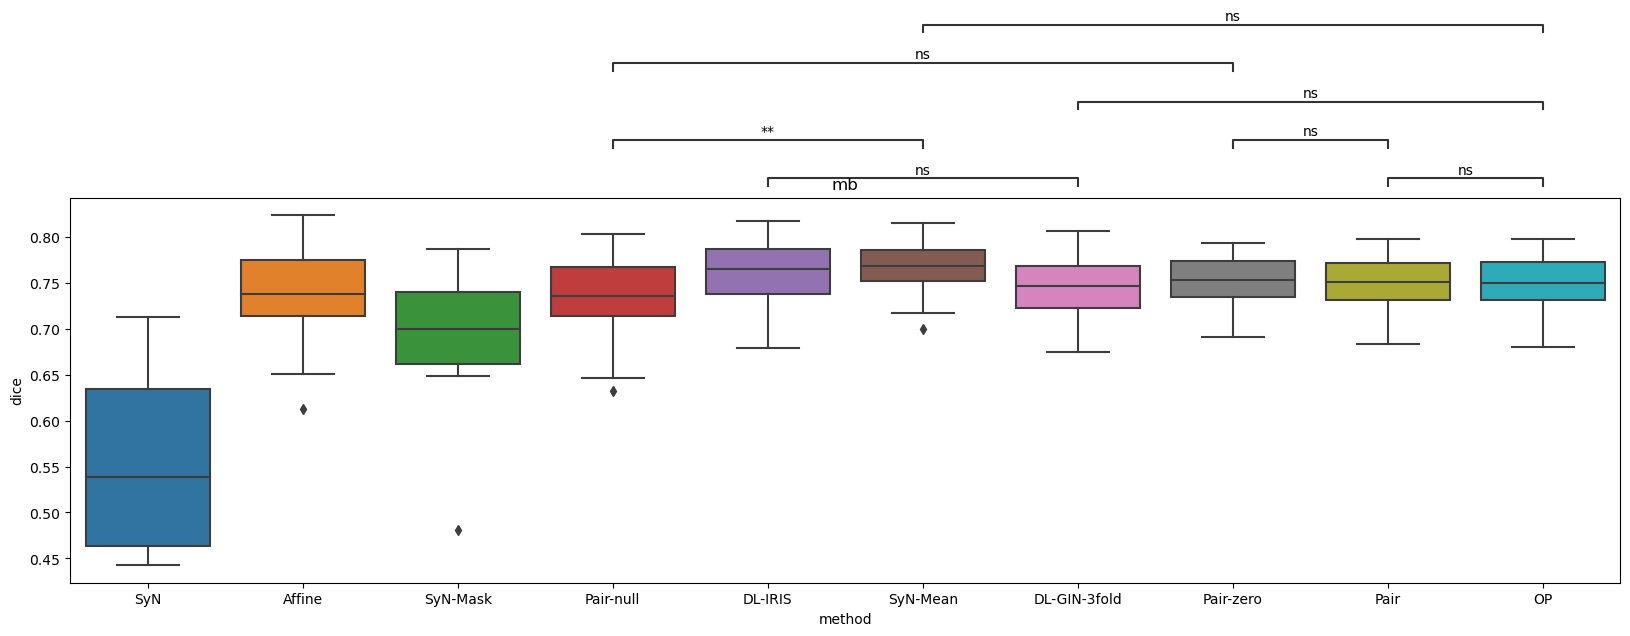

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Pair vs. OP: Mann-Whitney-Wilcoxon test two-sided, P_val:4.261e-01 U_stat=3.180e+02
Pair-zero vs. Pair: Mann-Whitney-Wilcoxon test two-sided, P_val:6.171e-02 U_stat=2.560e+02
DL-IRIS vs. DL-GIN-3fold: Mann-Whitney-Wilcoxon test two-sided, P_val:5.918e-01 U_stat=3.960e+02
Pair-null vs. SyN-Mean: Mann-Whitney-Wilcoxon test two-sided, P_val:5.221e-01 U_stat=4.020e+02
DL-GIN-3fold vs. OP: Mann-Whitney-Wilcoxon test two-sided, P_val:2.066e-01 U_stat=2.910e+02
Pair-null vs. Pair-zero: Mann-Whitney-Wilcoxon test two-sided, P_val:1.368e-01 U_stat=4.510e+02
SyN-Mean vs. OP: Mann-Whitney-Wilcoxon test two-sided, P_val:7.199e-02 U_stat=2.600e+02


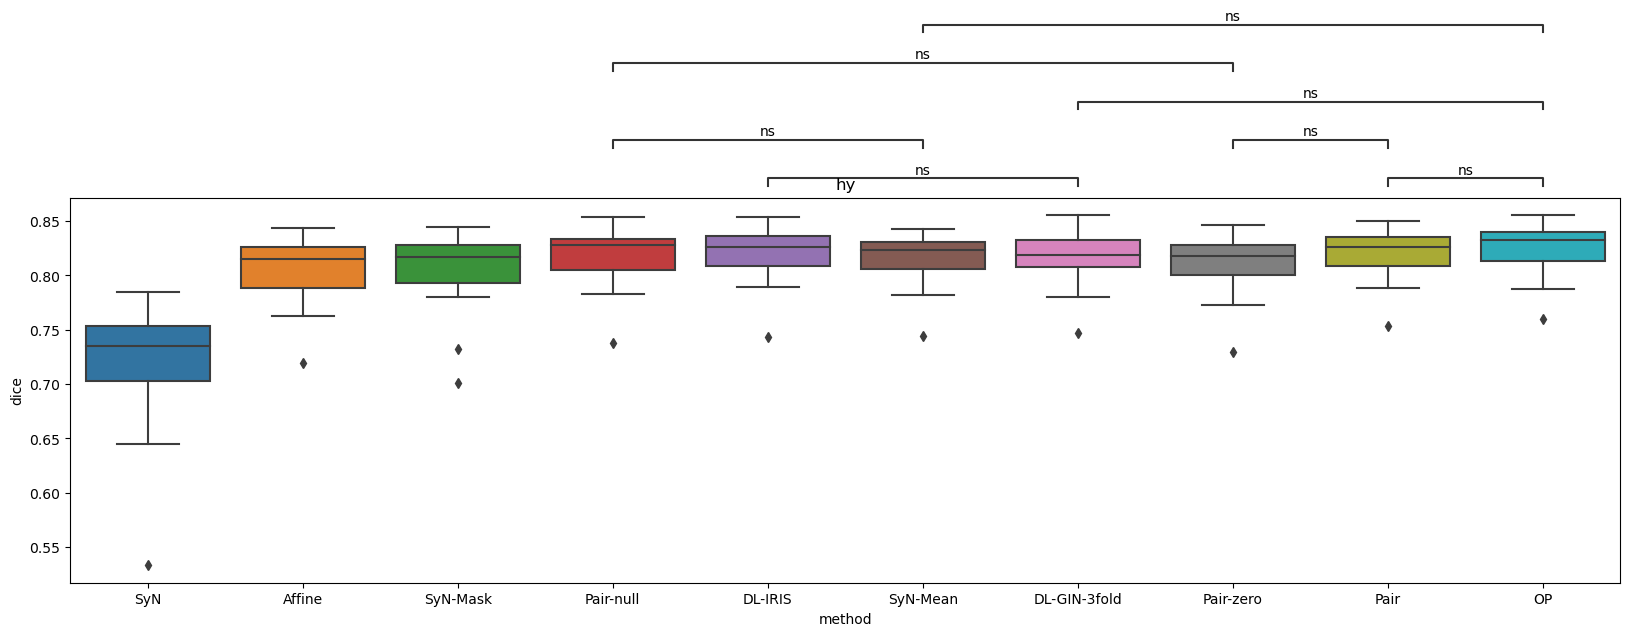

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Pair vs. OP: Mann-Whitney-Wilcoxon test two-sided, P_val:9.036e-01 U_stat=3.570e+02
Pair-zero vs. Pair: Mann-Whitney-Wilcoxon test two-sided, P_val:1.510e-01 U_stat=2.810e+02
DL-IRIS vs. DL-GIN-3fold: Mann-Whitney-Wilcoxon test two-sided, P_val:7.424e-01 U_stat=3.450e+02
Pair-null vs. SyN-Mean: Mann-Whitney-Wilcoxon test two-sided, P_val:1.697e-02 U_stat=2.260e+02
DL-GIN-3fold vs. OP: Mann-Whitney-Wilcoxon test two-sided, P_val:2.066e-01 U_stat=2.910e+02
Pair-null vs. Pair-zero: Mann-Whitney-Wilcoxon test two-sided, P_val:1.510e-01 U_stat=2.810e+02
SyN-Mean vs. OP: Mann-Whitney-Wilcoxon test two-sided, P_val:3.683e-01 U_stat=3.120e+02


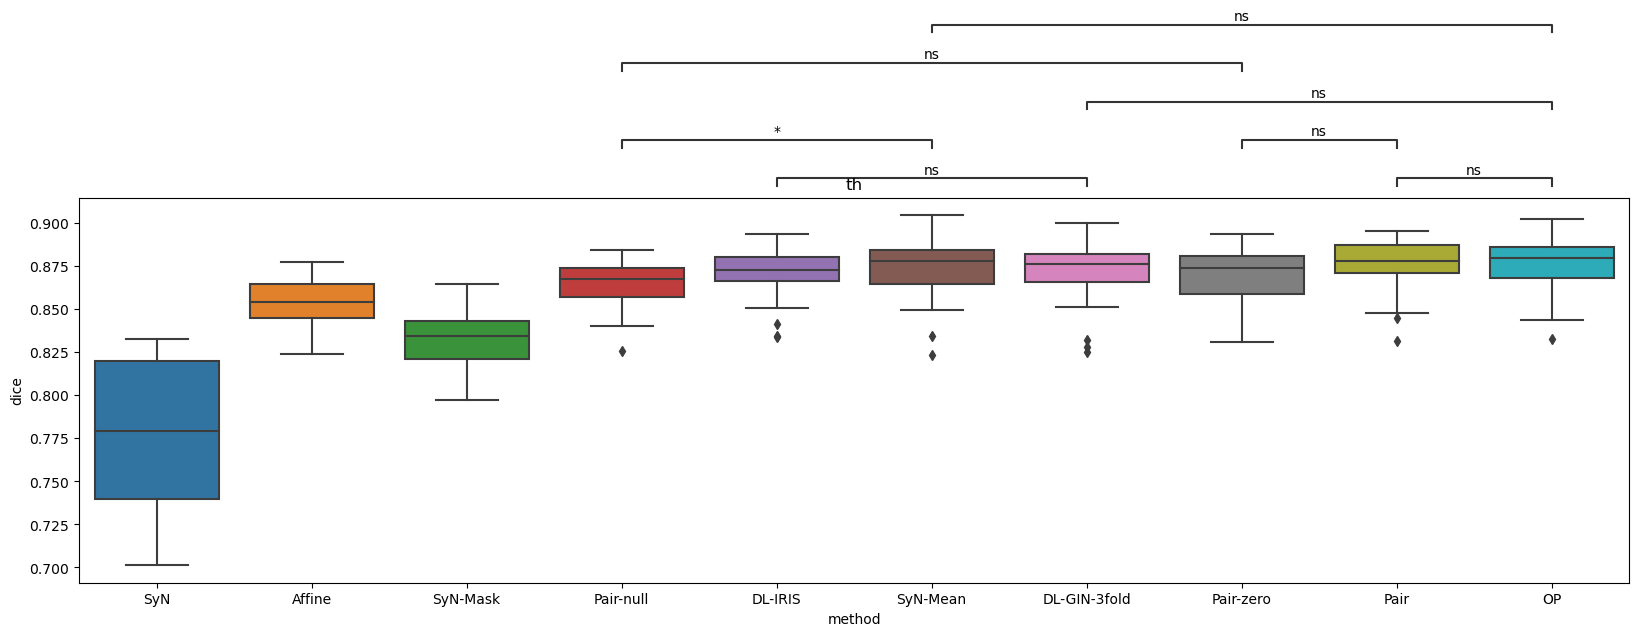

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Pair vs. OP: Mann-Whitney-Wilcoxon test two-sided, P_val:7.164e-01 U_stat=3.860e+02
Pair-zero vs. Pair: Mann-Whitney-Wilcoxon test two-sided, P_val:3.326e-01 U_stat=3.080e+02
DL-IRIS vs. DL-GIN-3fold: Mann-Whitney-Wilcoxon test two-sided, P_val:7.555e-01 U_stat=3.830e+02
Pair-null vs. SyN-Mean: Mann-Whitney-Wilcoxon test two-sided, P_val:6.159e-01 U_stat=3.350e+02
DL-GIN-3fold vs. OP: Mann-Whitney-Wilcoxon test two-sided, P_val:5.681e-01 U_stat=3.310e+02
Pair-null vs. Pair-zero: Mann-Whitney-Wilcoxon test two-sided, P_val:4.465e-01 U_stat=3.200e+02
SyN-Mean vs. OP: Mann-Whitney-Wilcoxon test two-sided, P_val:2.394e-01 U_stat=2.960e+02


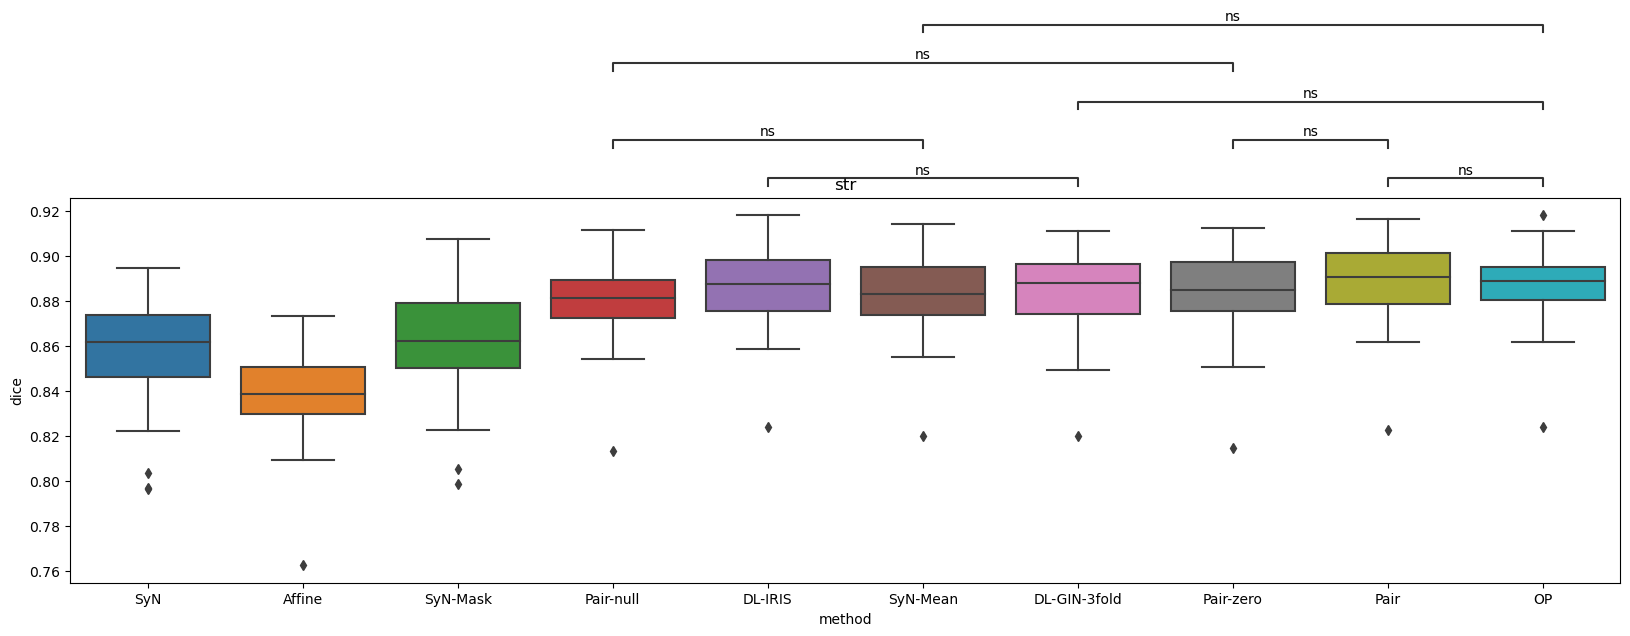

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Pair vs. OP: Mann-Whitney-Wilcoxon test two-sided, P_val:1.619e-02 U_stat=2.250e+02
Pair-zero vs. Pair: Mann-Whitney-Wilcoxon test two-sided, P_val:2.535e-01 U_stat=2.980e+02
DL-IRIS vs. DL-GIN-3fold: Mann-Whitney-Wilcoxon test two-sided, P_val:7.819e-01 U_stat=3.480e+02
Pair-null vs. SyN-Mean: Mann-Whitney-Wilcoxon test two-sided, P_val:4.999e-01 U_stat=4.040e+02
DL-GIN-3fold vs. OP: Mann-Whitney-Wilcoxon test two-sided, P_val:1.212e-02 U_stat=2.190e+02
Pair-null vs. Pair-zero: Mann-Whitney-Wilcoxon test two-sided, P_val:5.704e-02 U_stat=4.750e+02
SyN-Mean vs. OP: Mann-Whitney-Wilcoxon test two-sided, P_val:2.680e-02 U_stat=2.360e+02


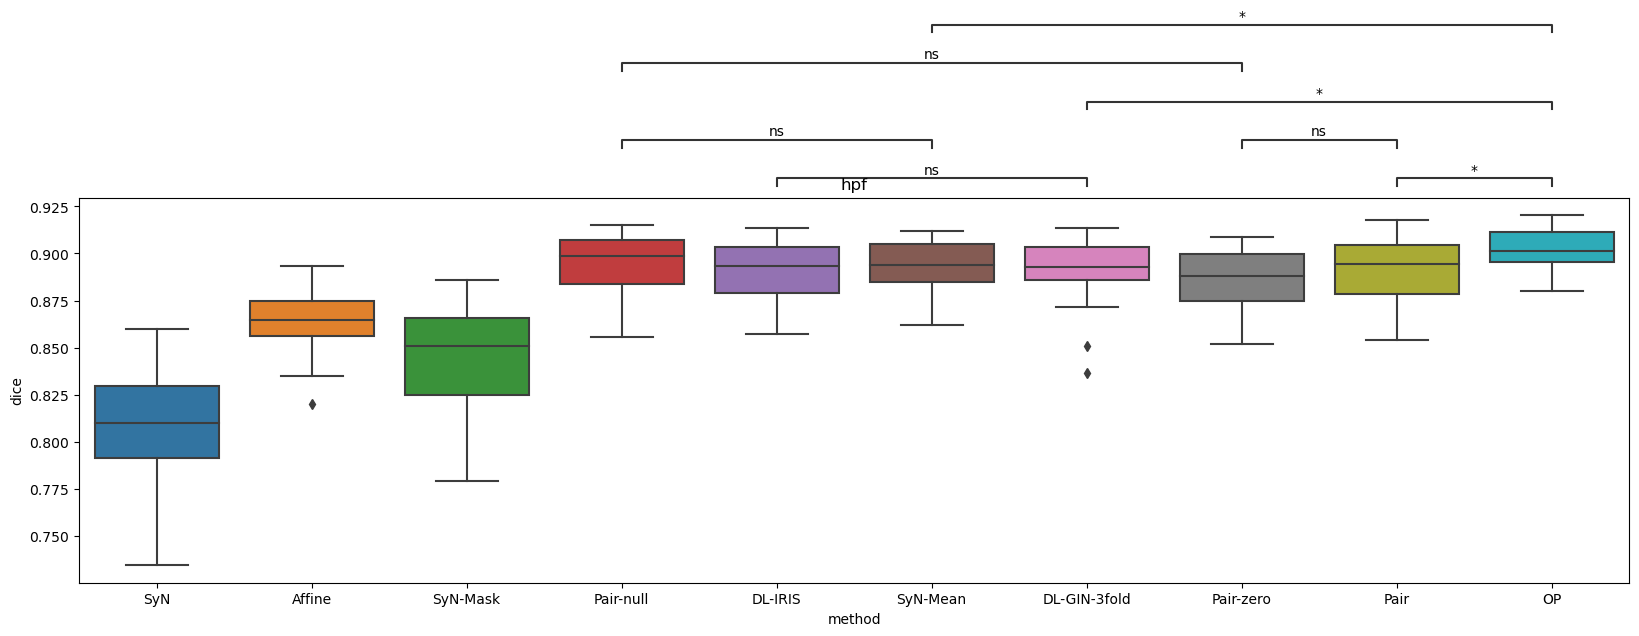

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Pair vs. OP: Mann-Whitney-Wilcoxon test two-sided, P_val:3.502e-01 U_stat=4.190e+02
Pair-zero vs. Pair: Mann-Whitney-Wilcoxon test two-sided, P_val:6.780e-01 U_stat=3.400e+02
DL-IRIS vs. DL-GIN-3fold: Mann-Whitney-Wilcoxon test two-sided, P_val:7.424e-01 U_stat=3.450e+02
Pair-null vs. SyN-Mean: Mann-Whitney-Wilcoxon test two-sided, P_val:2.832e-05 U_stat=1.220e+02
DL-GIN-3fold vs. OP: Mann-Whitney-Wilcoxon test two-sided, P_val:3.074e-01 U_stat=3.050e+02
Pair-null vs. Pair-zero: Mann-Whitney-Wilcoxon test two-sided, P_val:3.055e-05 U_stat=1.230e+02
SyN-Mean vs. OP: Mann-Whitney-Wilcoxon test two-sided, P_val:3.966e-01 U_stat=4.140e+02


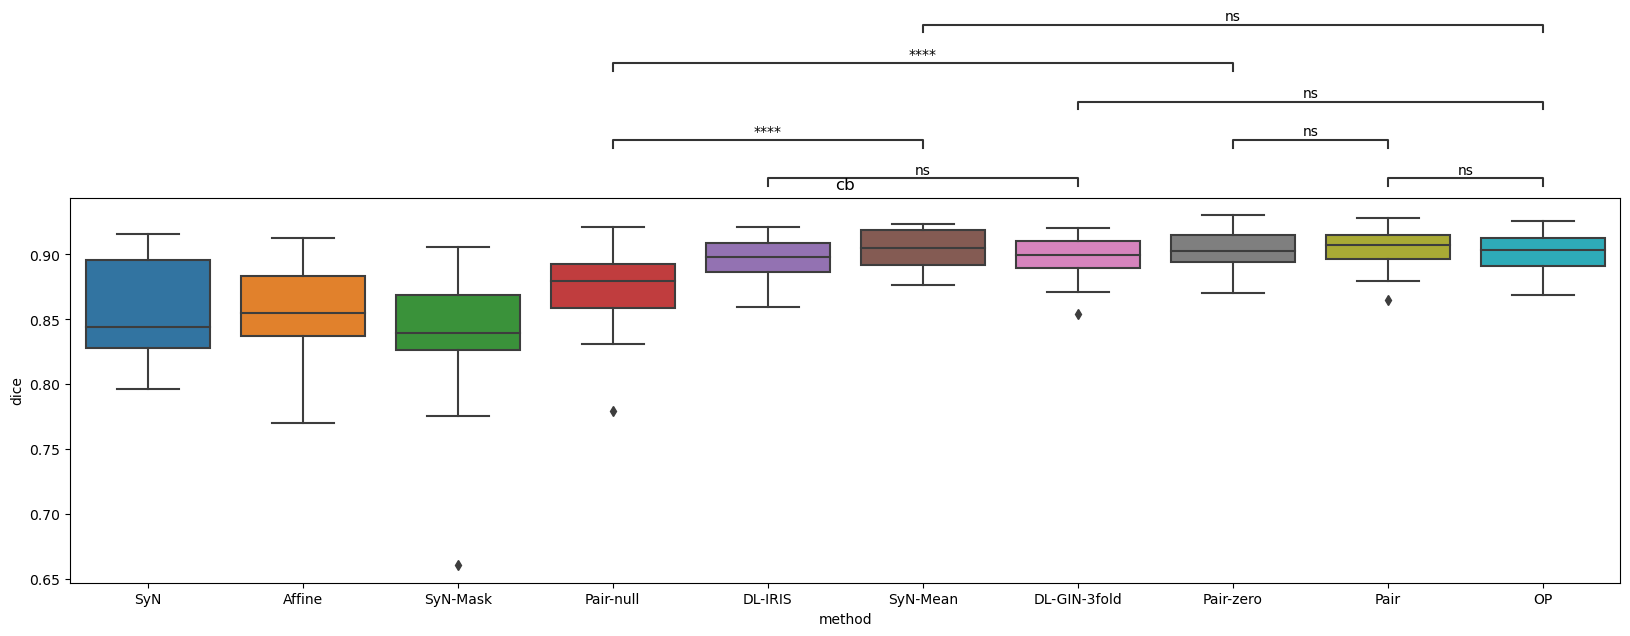

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Pair vs. OP: Mann-Whitney-Wilcoxon test two-sided, P_val:8.677e-02 U_stat=4.640e+02
Pair-zero vs. Pair: Mann-Whitney-Wilcoxon test two-sided, P_val:3.194e-02 U_stat=2.400e+02
DL-IRIS vs. DL-GIN-3fold: Mann-Whitney-Wilcoxon test two-sided, P_val:1.068e-06 U_stat=6.470e+02
Pair-null vs. SyN-Mean: Mann-Whitney-Wilcoxon test two-sided, P_val:5.567e-08 U_stat=5.000e+01
DL-GIN-3fold vs. OP: Mann-Whitney-Wilcoxon test two-sided, P_val:4.465e-01 U_stat=3.200e+02
Pair-null vs. Pair-zero: Mann-Whitney-Wilcoxon test two-sided, P_val:4.748e-04 U_stat=5.670e+02
SyN-Mean vs. OP: Mann-Whitney-Wilcoxon test two-sided, P_val:4.230e-10 U_stat=7.260e+02


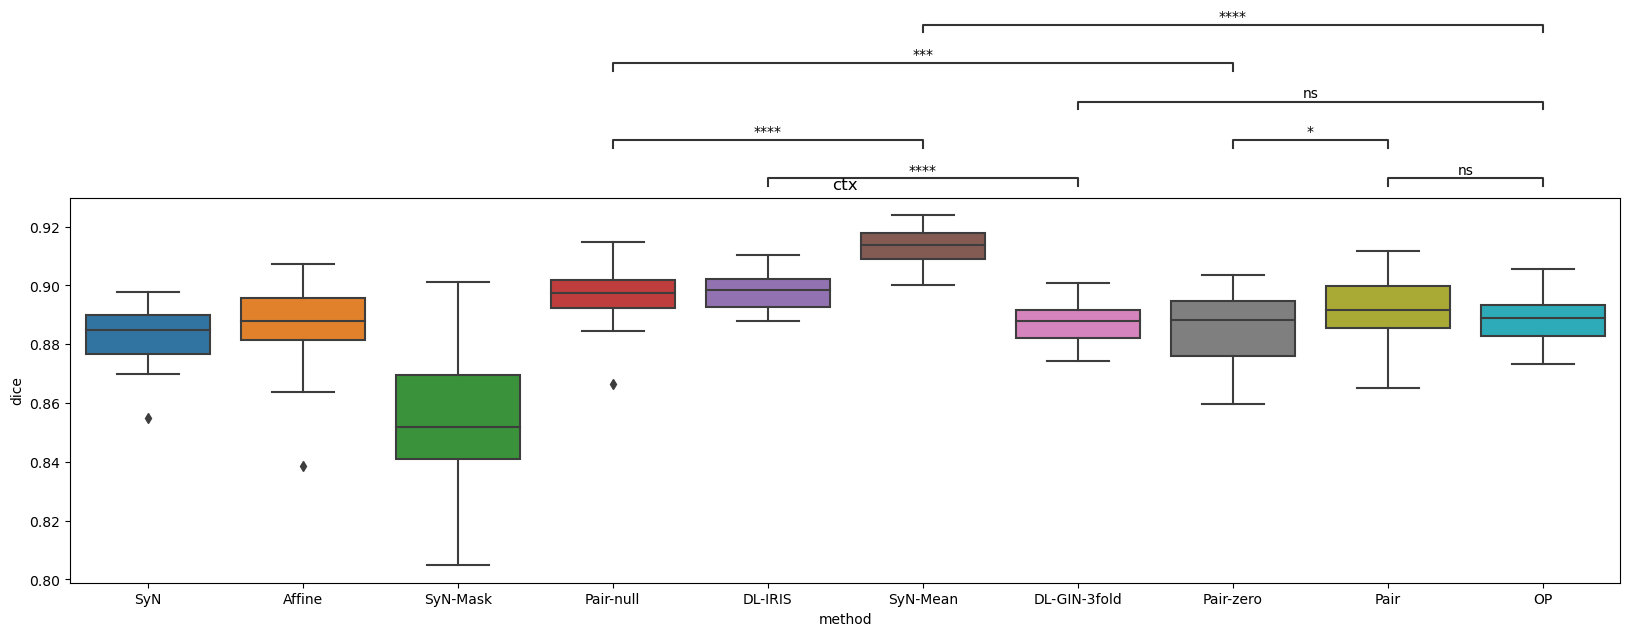

In [34]:
from statannotations.Annotator import Annotator
for item in structRanking.index :
    plt.figure(figsize=(20,5))
    ax=sns.boxplot(data=df[df["struct"]==item], x="method",y="dice", order=methodRanking.index )
    plt.title(item)
    pairs=[("Pair","OP"),("Pair","Pair-zero"),('DL-GIN-3fold','DL-IRIS'),('DL-GIN-3fold','OP'),("Pair-null","Pair-zero"),("Pair-null","SyN-Mean"),("OP","SyN-Mean")]
    annotator = Annotator(ax, pairs, data=df[df["struct"]==item], x="method",y="dice", order=methodRanking.index.tolist() )
    annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
    annotator.apply_and_annotate()
    plt.show()

In [ ]:
.tolist()

In [138]:
methodRanking.index.tolist()

['Affine', 'Pair', 'OP']

In [35]:
df.pivot(index='method', columns=['mouse',"struct"],values="dice").T.ptests(paired=True)


method,Affine,DL-GIN-3fold,DL-IRIS,OP,Pair,Pair-null,Pair-zero,SyN,SyN-Mask,SyN-Mean
method,,,,,,,,,,
Affine,-,***,***,***,***,***,***,***,,***
DL-GIN-3fold,-10.808,-,,***,*,***,,***,***,
DL-IRIS,-11.225,0.65,-,***,***,***,*,***,***,
OP,-12.03,-5.155,-4.262,-,,***,***,***,***,***
Pair,-11.0,-2.409,-4.45,1.722,-,***,***,***,***,**
Pair-null,-10.654,4.819,8.842,8.46,8.369,-,***,***,***,***
Pair-zero,-10.127,-0.565,-2.236,3.749,4.304,-6.816,-,***,***,
SyN,5.077,15.586,14.574,18.165,16.851,12.362,15.854,-,***,***
SyN-Mask,-1.886,12.724,9.489,16.847,13.237,6.571,11.158,-8.622,-,***


In [36]:
for item in df["struct"].unique() :
    print(item)
    display(df[df["struct"]==item].pivot(index='method', columns=['mouse',"struct"],values="dice").T.ptests(paired=True))


hy


method,Affine,DL-GIN-3fold,DL-IRIS,OP,Pair,Pair-null,Pair-zero,SyN,SyN-Mask,SyN-Mean
method,,,,,,,,,,
Affine,-,***,***,***,***,***,,***,,***
DL-GIN-3fold,-4.375,-,,**,,,*,***,*,
DL-IRIS,-7.184,-1.582,-,**,,,***,***,**,*
OP,-7.355,-3.614,-3.1,-,**,**,***,***,***,***
Pair,-6.004,-1.965,-0.909,3.624,-,,***,***,**,***
Pair-null,-7.172,-0.809,1.317,3.44,1.565,-,**,***,**,
Pair-zero,-1.937,2.329,4.872,10.026,7.461,3.525,-,***,,**
SyN,9.455,9.697,10.143,11.244,10.46,10.562,9.732,-,***,***
SyN-Mask,-0.232,2.142,2.949,4.541,3.474,2.797,1.035,-11.425,-,*


mb


method,Affine,DL-GIN-3fold,DL-IRIS,OP,Pair,Pair-null,Pair-zero,SyN,SyN-Mask,SyN-Mean
method,,,,,,,,,,
Affine,-,,**,,,,,***,***,**
DL-GIN-3fold,-1.131,-,***,,,*,,***,***,***
DL-IRIS,-3.507,-4.812,-,***,**,***,**,***,***,
OP,-1.652,-1.985,3.924,-,,**,,***,***,***
Pair,-1.615,-1.257,2.878,0.114,-,**,,***,***,***
Pair-null,0.344,2.435,5.944,3.144,3.035,-,**,***,***,***
Pair-zero,-1.867,-1.566,3.229,-0.47,-0.611,-3.093,-,***,***,***
SyN,11.514,10.309,12.32,11.089,10.989,10.563,11.564,-,***,***
SyN-Mask,4.578,4.059,5.704,4.567,4.924,4.035,4.79,-9.25,-,***


hpf


method,Affine,DL-GIN-3fold,DL-IRIS,OP,Pair,Pair-null,Pair-zero,SyN,SyN-Mask,SyN-Mean
method,,,,,,,,,,
Affine,-,***,***,***,***,***,***,***,***,***
DL-GIN-3fold,-8.305,-,,***,,,,***,***,
DL-IRIS,-10.111,0.185,-,***,,***,**,***,***,
OP,-15.061,-4.128,-7.732,-,***,***,***,***,***,***
Pair,-11.783,-0.024,-0.593,7.422,-,***,***,***,***,
Pair-null,-15.178,-1.138,-4.572,4.833,-3.798,-,***,***,***,
Pair-zero,-8.713,1.419,3.403,10.608,4.979,8.84,-,***,***,***
SyN,12.258,15.1,24.349,23.432,24.916,26.4,23.281,-,***,***
SyN-Mask,4.063,8.212,11.517,12.65,12.322,12.836,9.969,-12.325,-,***


str


method,Affine,DL-GIN-3fold,DL-IRIS,OP,Pair,Pair-null,Pair-zero,SyN,SyN-Mask,SyN-Mean
method,,,,,,,,,,
Affine,-,***,***,***,***,***,***,**,***,***
DL-GIN-3fold,-10.878,-,,,,,,***,***,
DL-IRIS,-11.99,-0.929,-,,,***,,***,***,**
OP,-13.315,-1.843,-0.855,-,,***,*,***,***,**
Pair,-11.478,-1.482,-1.584,-0.531,-,***,**,***,***,***
Pair-null,-12.466,0.846,4.998,5.232,5.71,-,*,***,***,
Pair-zero,-10.536,-0.182,1.682,2.095,3.581,-2.308,-,***,***,
SyN,-3.433,4.844,8.149,8.037,8.425,6.731,7.001,-,*,***
SyN-Mask,-4.56,4.264,8.068,7.717,8.413,6.181,7.097,-2.538,-,***


ctx


method,Affine,DL-GIN-3fold,DL-IRIS,OP,Pair,Pair-null,Pair-zero,SyN,SyN-Mask,SyN-Mean
method,,,,,,,,,,
Affine,-,,***,,**,***,,,***,***
DL-GIN-3fold,0.032,-,***,,***,***,,,***,***
DL-IRIS,-5.322,-14.029,-,***,**,,***,***,***,***
OP,-0.804,-1.989,9.595,-,**,***,*,**,***,***
Pair,-3.427,-3.769,3.539,-3.193,-,**,***,***,***,***
Pair-null,-7.746,-8.234,1.213,-7.009,-3.563,-,***,***,***,***
Pair-zero,1.07,1.158,6.673,2.073,4.761,6.394,-,,***,***
SyN,1.621,1.738,7.852,2.881,4.965,8.344,0.483,-,***,***
SyN-Mask,9.964,9.082,11.676,10.646,12.615,12.929,9.378,11.089,-,***


gp


method,Affine,DL-GIN-3fold,DL-IRIS,OP,Pair,Pair-null,Pair-zero,SyN,SyN-Mask,SyN-Mean
method,,,,,,,,,,
Affine,-,***,***,***,***,***,***,*,,***
DL-GIN-3fold,-5.018,-,**,*,*,,**,***,**,
DL-IRIS,-6.672,-2.781,-,**,,***,*,***,***,*
OP,-6.265,-2.386,3.089,-,*,*,***,***,***,
Pair,-5.642,-2.739,-0.094,-2.493,-,**,*,***,***,
Pair-null,-6.921,-0.448,4.745,2.71,3.096,-,***,***,***,***
Pair-zero,-6.629,-3.439,-2.264,-4.4,-2.284,-4.719,-,***,***,**
SyN,-2.528,3.89,8.25,8.031,6.453,7.072,7.904,-,,***
SyN-Mask,-2.043,3.702,8.031,7.313,6.45,6.747,7.738,1.368,-,***


th


method,Affine,DL-GIN-3fold,DL-IRIS,OP,Pair,Pair-null,Pair-zero,SyN,SyN-Mask,SyN-Mean
method,,,,,,,,,,
Affine,-,***,***,***,***,***,***,***,***,***
DL-GIN-3fold,-6.569,-,,,,*,,***,***,
DL-IRIS,-8.839,0.051,-,***,***,***,,***,***,
OP,-9.307,-1.732,-4.988,-,,***,***,***,***,***
Pair,-9.056,-1.291,-3.771,1.43,-,***,***,***,***,*
Pair-null,-7.37,2.754,4.413,8.671,7.127,-,*,***,***,***
Pair-zero,-6.533,0.963,1.726,4.613,4.96,-2.187,-,***,***,*
SyN,8.595,9.751,11.352,11.321,11.174,9.817,10.322,-,***,***
SyN-Mask,5.35,8.425,11.862,11.97,11.021,8.627,9.025,-7.842,-,***


cb


method,Affine,DL-GIN-3fold,DL-IRIS,OP,Pair,Pair-null,Pair-zero,SyN,SyN-Mask,SyN-Mean
method,,,,,,,,,,
Affine,-,***,***,***,***,***,***,,***,***
DL-GIN-3fold,-8.635,-,,**,***,***,***,***,***,***
DL-IRIS,-9.419,0.445,-,**,***,***,***,***,***,***
OP,-9.256,-3.696,-3.526,-,*,***,,***,***,**
Pair,-10.865,-4.877,-7.877,-2.609,-,***,,***,***,
Pair-null,-10.327,5.794,6.284,6.493,8.326,-,***,***,***,***
Pair-zero,-10.288,-3.86,-6.059,-1.696,1.59,-7.581,-,***,***,
SyN,0.187,7.649,8.156,8.63,9.189,3.835,8.875,-,**,***
SyN-Mask,4.195,8.627,8.892,9.221,10.326,7.994,9.813,3.343,-,***


olf


method,Affine,DL-GIN-3fold,DL-IRIS,OP,Pair,Pair-null,Pair-zero,SyN,SyN-Mask,SyN-Mean
method,,,,,,,,,,
Affine,-,***,***,***,***,***,***,***,***,***
DL-GIN-3fold,-30.892,-,***,**,***,***,***,***,***,***
DL-IRIS,-40.89,17.85,-,***,***,***,***,,***,
OP,-28.57,-3.175,-17.605,-,***,***,***,***,***,***
Pair,-31.331,6.637,-16.897,6.678,-,***,**,***,,***
Pair-null,-18.882,21.265,8.266,19.322,23.917,-,***,,***,***
Pair-zero,-16.41,6.32,-7.474,6.303,3.114,-10.187,-,**,,***
SyN,-4.105,6.959,0.029,7.334,4.676,-1.367,3.654,-,***,
SyN-Mask,-20.027,4.434,-10.451,5.158,0.714,-12.384,-1.755,-5.78,-,***


In [37]:
post_hocs = pg.pairwise_tests(dv='dice_mean', within='method',subject="struct", data=dfMouseAvg,padjust="fdr_bh")
post_hocs[post_hocs["p-corr"]>0.05].sort_values("p-unc")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
38,method,Pair-null,SyN-Mean,True,True,-3.213414,8.0,two-sided,0.012361,0.050567,fdr_bh,5.376,-0.141601
36,method,Pair-null,SyN,True,True,2.978994,8.0,two-sided,0.017627,0.060799,fdr_bh,4.067,0.504324
10,method,DL-GIN-3fold,OP,True,True,-2.926103,8.0,two-sided,0.019112,0.060799,fdr_bh,3.818,-0.096377
40,method,Pair-zero,SyN-Mask,True,True,2.909294,8.0,two-sided,0.019610,0.060799,fdr_bh,3.742,0.430324
1,method,Affine,DL-IRIS,True,True,-2.887837,8.0,two-sided,0.020266,0.060799,fdr_bh,3.647,-0.381213
3,method,Affine,Pair,True,True,-2.778803,8.0,two-sided,0.023969,0.067008,fdr_bh,3.201,-0.470279
2,method,Affine,OP,True,True,-2.743447,8.0,two-sided,0.025314,0.067008,fdr_bh,3.069,-0.489484
19,method,DL-IRIS,Pair-null,True,True,2.664782,8.0,two-sided,0.028593,0.069617,fdr_bh,2.794,0.134380
4,method,Affine,Pair-null,True,True,-2.646965,8.0,two-sided,0.029394,0.069617,fdr_bh,2.735,-0.251101
0,method,Affine,DL-GIN-3fold,True,True,-2.510299,8.0,two-sided,0.036354,0.081152,fdr_bh,2.324,-0.401965


In [38]:
post_hocs = pg.pairwise_tests(dv='dice', between='method', data=df,padjust="fdr_bh")
post_hocs[post_hocs["p-corr"]>0.05].sort_values("p-unc")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
35,method,Pair-null,Pair-zero,False,True,-2.070284,484.0,two-sided,0.038955,0.067423,fdr_bh,0.802,-0.187529
12,method,DL-GIN-3fold,Pair-null,False,True,1.763509,484.0,two-sided,0.078446,0.130743,fdr_bh,0.455,0.159741
38,method,Pair-null,SyN-Mean,False,True,-1.623651,484.0,two-sided,0.105101,0.168913,fdr_bh,0.362,-0.147072
19,method,DL-IRIS,Pair-null,False,True,1.539646,484.0,two-sided,0.124300,0.192880,fdr_bh,0.318,0.139463
17,method,DL-IRIS,OP,False,True,-1.378741,484.0,two-sided,0.168611,0.252917,fdr_bh,0.253,-0.124888
29,method,OP,SyN-Mean,False,True,1.205285,484.0,two-sided,0.228682,0.331958,fdr_bh,0.204,0.109176
10,method,DL-GIN-3fold,OP,False,True,-1.089878,484.0,two-sided,0.276309,0.388560,fdr_bh,0.179,-0.098722
18,method,DL-IRIS,Pair,False,True,-1.069564,484.0,two-sided,0.285349,0.389112,fdr_bh,0.176,-0.096882
26,method,OP,Pair-zero,False,True,0.963068,484.0,two-sided,0.335994,0.444698,fdr_bh,0.158,0.087236
34,method,Pair,SyN-Mean,False,True,0.903547,484.0,two-sided,0.366685,0.471452,fdr_bh,0.15,0.081844
